In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
import math

In [3]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
import joblib

# Data check

- train.csv - the training set. Daily historical data from January 2013 to October 2015.
- test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
- items.csv - supplemental information about the items/products.
- item_categories.csv  - supplemental information about the items categories.
- shops.csv- supplemental information about the shops.

- ID - an Id that represents a (Shop, Item) tuple within the test set
- shop_id - unique identifier of a shop
- item_id - unique identifier of a product
- item_category_id - unique identifier of item category
- item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
- item_price - current price of an item
- date - date in format dd/mm/yyyy
- date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
- item_name - name of item
- shop_name - name of shop
- item_category_name - name of item category

## Shape

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(2935849, 6)
(214200, 3)


In [7]:
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

print(items.shape)
print(item_categories.shape)
print(shops.shape)

(22170, 3)
(84, 2)
(60, 2)


In [8]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
# train.head().T

In [10]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [11]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [12]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [13]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


## Column transform

### item_categories

In [14]:
item_categories.head(30)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [15]:
item_categories.tail(30)

,item_category_name,item_category_id
54,Книги - Цифра,54
55,Музыка - CD локального производства,55
56,Музыка - CD фирменного производства,56
57,Музыка - MP3,57
58,Музыка - Винил,58
59,Музыка - Музыкальное видео,59
60,Музыка - Подарочные издания,60
61,Подарки - Атрибутика,61
62,"Подарки - Гаджеты, роботы, спорт",62
63,Подарки - Мягкие игрушки,63


In [16]:
item_categories['split'] = item_categories['item_category_name'].str.split('-')

item_categories['type'] = item_categories['split'].map(lambda x: x[0].strip())
item_categories['type_id'] = LabelEncoder().fit_transform(item_categories['type'])

item_categories['subtype'] = item_categories['split'].map(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())
item_categories['subtype_id'] = LabelEncoder().fit_transform(item_categories['subtype'])

In [17]:
item_categories.head(30)

,item_category_name,item_category_id,split,type,type_id,subtype,subtype_id
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0,Гарнитуры/Наушники,29
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1,PS2,9
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1,PS3,10
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары,1,PS4,11
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары,1,PSP,13
5,Аксессуары - PSVita,5,"[Аксессуары , PSVita]",Аксессуары,1,PSVita,14
6,Аксессуары - XBOX 360,6,"[Аксессуары , XBOX 360]",Аксессуары,1,XBOX 360,16
7,Аксессуары - XBOX ONE,7,"[Аксессуары , XBOX ONE]",Аксессуары,1,XBOX ONE,17
8,Билеты (Цифра),8,[Билеты (Цифра)],Билеты (Цифра),2,Билеты (Цифра),26
9,Доставка товара,9,[Доставка товара],Доставка товара,3,Доставка товара,33


In [18]:
item_categories = item_categories[['item_category_id','type_id', 'subtype_id']]

In [19]:
item_categories = item_categories.astype('int64')

In [20]:
item_categories.to_csv('item_categories_pre.csv', index=False)

## Data merge

In [21]:
items.drop('item_name', axis=1, inplace=True)

In [22]:
train = pd.merge(train, items)
train = pd.merge(train, item_categories)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,type_id,subtype_id
0,02.01.2013,0,59,22154,999.0,1.0,37,11,1
1,23.01.2013,0,24,22154,999.0,1.0,37,11,1
2,20.01.2013,0,27,22154,999.0,1.0,37,11,1
3,02.01.2013,0,25,22154,999.0,1.0,37,11,1
4,03.01.2013,0,25,22154,999.0,1.0,37,11,1


In [23]:
test = pd.merge(test, items)
test = pd.merge(test, item_categories)
test.head()

,ID,shop_id,item_id,item_category_id,type_id,subtype_id
0,0,5,5037,19,5,10
1,5100,4,5037,19,5,10
2,10200,6,5037,19,5,10
3,15300,3,5037,19,5,10
4,20400,2,5037,19,5,10


## Info

In [24]:
def data_summary(data):
    summary = pd.DataFrame(data.dtypes, columns=['Dtype'])
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Count'] = data.shape[0]
    summary['Unique value'] = data.nunique().values
    summary['Null count'] = data.isnull().sum().values
    summary['Null percent'] = data.isnull().sum().values / len(data) * 100
    summary['Null percent'] = round(summary['Null percent'], 1)
    
    return summary

In [25]:
train_summary = data_summary(train)

In [26]:
test_summary = data_summary(test)

In [27]:
summary = pd.concat([train_summary, test_summary], axis=1, keys=['Train', 'Test'])
summary

Train                                                  \
                    Dtype      Count Unique value Null count Null percent   
date               object  2935849.0       1034.0        0.0          0.0   
date_block_num      int64  2935849.0         34.0        0.0          0.0   
shop_id             int64  2935849.0         60.0        0.0          0.0   
item_id             int64  2935849.0      21807.0        0.0          0.0   
item_price        float64  2935849.0      19993.0        0.0          0.0   
item_cnt_day      float64  2935849.0        198.0        0.0          0.0   
item_category_id    int64  2935849.0         84.0        0.0          0.0   
type_id             int64  2935849.0         20.0        0.0          0.0   
subtype_id          int64  2935849.0         65.0        0.0          0.0   
ID                    NaN        NaN          NaN        NaN          NaN   

                   Test                                                 
                  Dtype     Count Unique value Null count Null percent  
date                NaN       NaN          NaN        NaN          NaN  
date_block_num      NaN       NaN          NaN        NaN          NaN  
shop_id           int64  214200.0         42.0        0.0          0.0  
item_id           int64  214200.0       5100.0        0.0          0.0  
item_price          NaN       NaN          NaN        NaN          NaN  
item_cnt_day        NaN       NaN          NaN        NaN          NaN  
item_category_id  int64  214200.0         62.0        0.0          0.0  
type_id           int64  214200.0         16.0        0.0          0.0  
subtype_id        int64  214200.0         49.0        0.0          0.0  
ID                int64  214200.0     214200.0        0.0          0.0

In [28]:
train.dtypes.value_counts()

int64      6
float64    2
object     1
dtype: int64

In [29]:
test.dtypes.value_counts()

int64    6
dtype: int64

In [30]:
items_summary = data_summary(items)
items_summary

,Dtype,Count,Unique value,Null count,Null percent
item_id,int64,22170,22170,0,0.0
item_category_id,int64,22170,84,0,0.0


In [31]:
item_categories_summary = data_summary(item_categories)
item_categories_summary

,Dtype,Count,Unique value,Null count,Null percent
item_category_id,int64,84,84,0,0.0
type_id,int64,84,20,0,0.0
subtype_id,int64,84,65,0,0.0


In [32]:
shops_summary = data_summary(shops)
shops_summary

,Dtype,Count,Unique value,Null count,Null percent
shop_name,object,60,60,0,0.0
shop_id,int64,60,60,0,0.0


## 고유값 확인

In [33]:
for column in train.columns :
    print(f'{column} : {train[column].unique()}', '\n')

date : ['02.01.2013' '23.01.2013' '20.01.2013' ... '28.07.2015' '29.07.2015'
 '09.09.2015'] 

date_block_num : [ 0  1  2  3  7  8  9 11 30 31 32 33  4  5  6 10 12 13 14 15 16 17 18 19
 20 21 22 23 24 25 26 28 27 29] 

shop_id : [59 24 27 25  6 15  7 31 54 42 38 37 46 44 51 16  1  0 28 57 23 58 56 35
 47 21 22 19 18  8 30 41 45 32 29 50 53 43 17  2 52 13 14  3 10 12 26  5
  4 39 48 49 34 11 36 33  9 40 20 55] 

item_id : [22154   944   965 ... 13091 13094 13092] 

item_price : [ 999.          657.          299.         ... 1515.38461538 1533.33333333
 1296.27329193] 

item_cnt_day : [ 1.000e+00  2.000e+00 -1.000e+00  3.000e+00  4.000e+00  6.000e+00
  5.000e+00 -2.000e+00  4.500e+01  7.000e+00  8.000e+00  9.000e+00
  5.700e+01 -3.000e+00  3.300e+01  3.000e+01  1.000e+01  1.200e+01
  1.300e+01  1.600e+01  1.400e+01  1.100e+01  1.700e+01  1.800e+01
  3.200e+01  3.100e+01  1.500e+01  2.000e+01  1.900e+01  4.000e+01
  1.040e+02  3.800e+01  7.700e+01  4.700e+01  5.500e+01  2.800e+01
  1.100e+

In [34]:
summary[summary['Train']['Unique value'] != summary['Test']['Unique value']]

Train                                                  \
                    Dtype      Count Unique value Null count Null percent   
date               object  2935849.0       1034.0        0.0          0.0   
date_block_num      int64  2935849.0         34.0        0.0          0.0   
shop_id             int64  2935849.0         60.0        0.0          0.0   
item_id             int64  2935849.0      21807.0        0.0          0.0   
item_price        float64  2935849.0      19993.0        0.0          0.0   
item_cnt_day      float64  2935849.0        198.0        0.0          0.0   
item_category_id    int64  2935849.0         84.0        0.0          0.0   
type_id             int64  2935849.0         20.0        0.0          0.0   
subtype_id          int64  2935849.0         65.0        0.0          0.0   
ID                    NaN        NaN          NaN        NaN          NaN   

                   Test                                                 
                  Dtype     Count Unique value Null count Null percent  
date                NaN       NaN          NaN        NaN          NaN  
date_block_num      NaN       NaN          NaN        NaN          NaN  
shop_id           int64  214200.0         42.0        0.0          0.0  
item_id           int64  214200.0       5100.0        0.0          0.0  
item_price          NaN       NaN          NaN        NaN          NaN  
item_cnt_day        NaN       NaN          NaN        NaN          NaN  
item_category_id  int64  214200.0         62.0        0.0          0.0  
type_id           int64  214200.0         16.0        0.0          0.0  
subtype_id        int64  214200.0         49.0        0.0          0.0  
ID                int64  214200.0     214200.0        0.0          0.0

In [35]:
# One-hot-encoding 시 주의해야 할 column들
summary[(summary['Train']['Unique value'] != summary['Test']['Unique value'])
                        & (summary['Train']['Dtype'] == 'object')]

Train                                                  Test        \
       Dtype      Count Unique value Null count Null percent Dtype Count   
date  object  2935849.0       1034.0        0.0          0.0   NaN   NaN   

                                           
     Unique value Null count Null percent  
date          NaN        NaN          NaN

In [36]:
# 고유값이 너무 많은 column들
columns_many = summary[(summary['Train']['Unique value'] > 100) & (summary['Train']['Dtype'] == 'object')]
columns_many

Train                                                  Test        \
       Dtype      Count Unique value Null count Null percent Dtype Count   
date  object  2935849.0       1034.0        0.0          0.0   NaN   NaN   

                                           
     Unique value Null count Null percent  
date          NaN        NaN          NaN

In [37]:
list(columns_many.index)

['date']

## 결측치 확인

In [38]:
train_null = train_summary[train_summary['Null count'] > 0]

In [39]:
test_null = test_summary[test_summary['Null count'] > 0]

In [40]:
null_columns = pd.concat([train_null, test_null], axis=1, keys=['Train', 'Test'])
null_columns

Empty DataFrame
Columns: [(Train, Dtype), (Train, Count), (Train, Unique value), (Train, Null count), (Train, Null percent), (Test, Dtype), (Test, Count), (Test, Unique value), (Test, Null count), (Test, Null percent)]
Index: []

In [41]:
train[null_columns.index].dtypes.value_counts()

Series([], dtype: int64)

In [42]:
test[null_columns.index].dtypes.value_counts()

Series([], dtype: int64)

# 통계 및 분포 확인

## 수치형 data

In [43]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,type_id,subtype_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01,9.872360e+00,2.096082e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01,3.499719e+00,2.080453e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01,8.000000e+00,4.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01,1.100000e+01,1.100000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01,1.300000e+01,4.100000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01,1.900000e+01,6.400000e+01


In [44]:
columns_num = train.describe().columns

array([[<AxesSubplot:title={'center':'date_block_num'}>,
        <AxesSubplot:title={'center':'shop_id'}>,
        <AxesSubplot:title={'center':'item_id'}>],
       [<AxesSubplot:title={'center':'item_price'}>,
        <AxesSubplot:title={'center':'item_cnt_day'}>,
        <AxesSubplot:title={'center':'item_category_id'}>],
       [<AxesSubplot:title={'center':'type_id'}>,
        <AxesSubplot:title={'center':'subtype_id'}>, <AxesSubplot:>]],
      dtype=object)

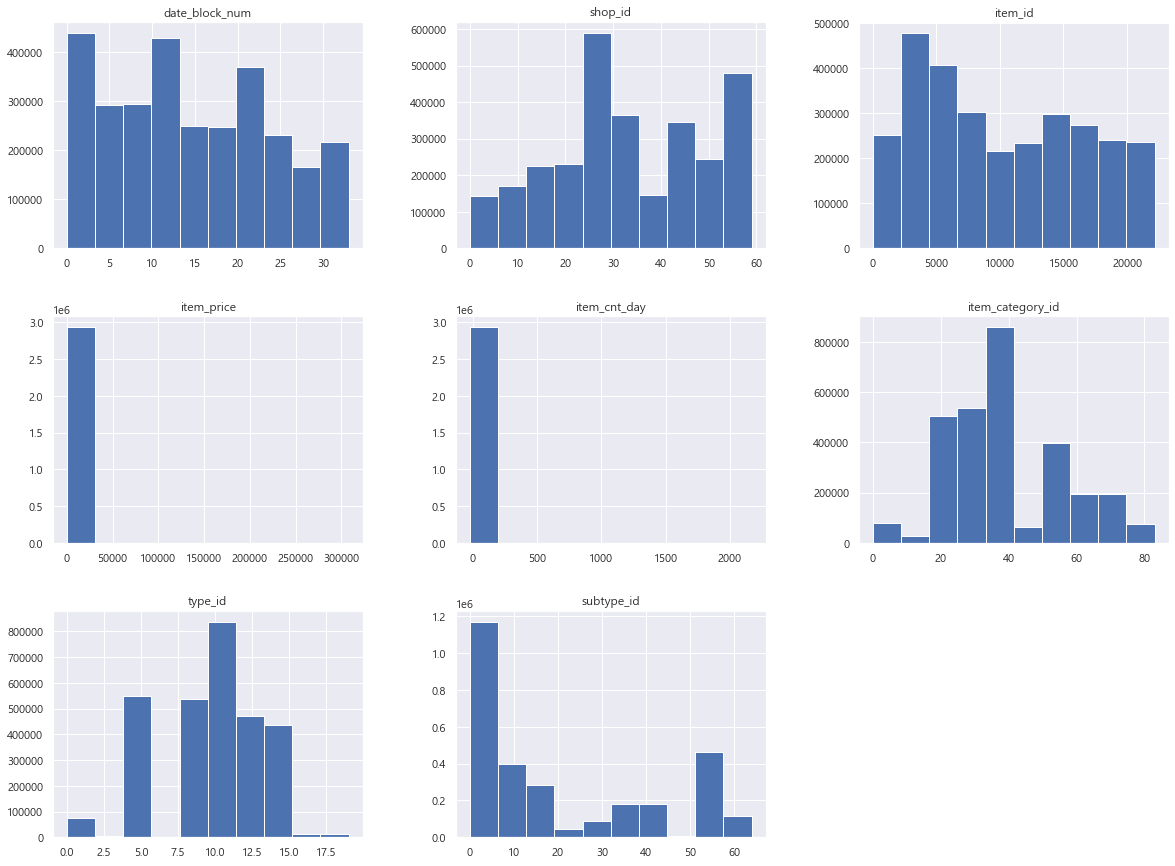

In [45]:
train[columns_num].hist(figsize=(20,15))

In [46]:
# test.describe()

In [47]:
# columns_num = test.describe().columns

In [48]:
# test[columns_num].hist(figsize=(20,15))

### 범주형 data 추출

In [49]:
columns_int = list(train.select_dtypes(include=['int64']).columns)
columns_int

['date_block_num',
 'shop_id',
 'item_id',
 'item_category_id',
 'type_id',
 'subtype_id']

In [50]:
columns_int.remove('date_block_num')

In [51]:
columns_float = list(train.select_dtypes(include=['float64']).columns)
columns_float

['item_price', 'item_cnt_day']

In [52]:
columns_float.remove('item_price')
columns_float.remove('item_cnt_day')

In [53]:
columns_to_cat = columns_int + columns_float
columns_to_cat

['shop_id', 'item_id', 'item_category_id', 'type_id', 'subtype_id']

### binary data 추출

In [54]:
columns_binary_num = []

In [55]:
joblib.dump(columns_binary_num, 'columns_binary_num.pkl')

['columns_binary_num.pkl']

## 범주형 data

In [56]:
columns_str = list(train.select_dtypes(include=['object']).columns)
columns_str

In [57]:
columns_bool = list(train.select_dtypes(include=['bool']).columns)
columns_bool

In [58]:
columns_cat = columns_str + columns_bool + columns_to_cat
columns_cat

In [59]:
columns_dt = ['date']

In [60]:
for column in columns_dt :
    columns_cat.remove(column)

In [61]:
joblib.dump(columns_cat, 'columns_cat.pkl')

['columns_cat.pkl']

In [62]:
joblib.dump(columns_dt, 'columns_dt.pkl')

['columns_dt.pkl']

### train data

In [63]:
# value값을 20개 이하로 가지는 column을 선택
# value값이 너무 많으면 countplot을 그리는데 시간이 너무 많이 소요됨
columns_cat_count = []

for column in columns_cat :
    
    if len(train[column].value_counts()) <= 20 :
        columns_cat_count.append(column)

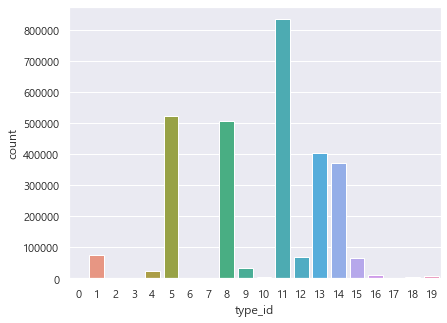

In [64]:
k = len(columns_cat_count)
m = math.ceil(k / 2)

plt.figure(figsize=(16, 5 * m))
grid = plt.GridSpec(m, 2, wspace=0.4, hspace=0.3)

for i in range(k) :    
    ax = plt.subplot(grid[i])
    sns.countplot(data=train, x=columns_cat_count[i], ax=ax)

### test data

### 전체 dataset

### binary data 추출

In [65]:
columns_binary_cat = []

In [66]:
joblib.dump(columns_binary_cat, 'columns_binary_cat.pkl')

['columns_binary_cat.pkl']